<center><h1>Summarizing Ohio Teacher or Education Employee Salary</h1></center>
<center><h2>Using Python and Pandas Library</h2></center>

This IPython notebook demonstrates how to do basic data cleaning and analysis on a csv or Excel file containing salary information of Ohio's public teachers.  We will be using the Python programming language and Pandas data analysis package to perform the data analysis.

I obtained Ohio teachers' salary information from Ohio's state treasurer's <a href='http://www.tos.ohio.gov/Transparency_Teacher.aspx'>web site</a>.

<a name='top'></a>

## Sections

- [Fetching the data](#fetch)
- [Data clean-up](#clean)
- [Basic summary counts](#basic_summary)
- [Filtering data](#sql)
- [Simple visualization and Top School Districts](#visualization)
- [Merging data sets together](#merging)
- [Top 25 Median Salaries by School Discricts](#top25)

<a name='fetch'></a>

# Fetching The Data

In [1]:
import pandas as pd
pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",20)

ohio = pd.read_excel("http://www.tos.ohio.gov/Documents/Transparency/2013%20-%202014%20School%20Year%20Staff%20Salary%20Information.xlsx",
                  "Data tab",index_col=None, na_values=['NA'])

You can get the data (xlsx file) directly from the Ohio treasurer's web site (*can take a few minutes*):

## or

#### Download the data locally as a CSV file, then read it:

In [51]:
import pandas as pd
# Let's read the data, but we need to remove commas and dollar signs from the PAY AMOUNT column
# Otherwise it will be read as a string or text value.  We can't do statistics on text or string values!
# 'ohio' is a data structure created by pandas that is similar to what a table would look like
ohio = pd.read_csv('/home/pybokeh/Desktop/2012-2013_School_Year_Staff_Information.csv',
                   converters={'PAY AMOUNT': lambda x: float(x.replace('$', '').replace(',',''))})

#### Now let's take a peek at our data, but in doing so, we have to set certain display settings per the [documentation](http://pandas.pydata.org/pandas-docs/stable/options.html):

In [3]:
ohio.head()

,LAST NAME,FIRST NAME,EDUCATION LEVEL,JOB DESCRIPTION,DISTRICT NAME,SCHOOL NAME,CITY NAME,DAYS WORKED,HOURS WORKED PER DAY,PAY AMOUNT
0,LONGDEN,CHERYL,Masters,Tutor/Small Group Instructor Assignment (Serve...,Ashtabula Area City,Lakeside High School,Ashtabula,185,7.00,23544
1,SIKES,LINDA,Masters,Counseling Assignment,Yellow Springs Exempted Village,Yellow Springs/McKinney High School,Yellow Springs,194,7.00,80949
2,SMITH,SHERRY,Masters,Other Professional  Other Assignment,Greene County ESC,Greene County ESC,Yellow Springs,103,7.50,24322
3,BALOG,GEORGE,Masters,Teacher Assignment,Dayton City,Stivers School For The Arts,Dayton,200,4.35,36964
4,BAUER,RICHARD,Masters,Teacher Assignment,North Olmsted City,North Olmsted Middle School,North Olmsted,185,7.50,91187


#### I also like to see if there are any Null values in our dataframe using the info() function

In [5]:
ohio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272731 entries, 0 to 272730
Data columns (total 10 columns):
LAST NAME               272710 non-null object
FIRST NAME              272645 non-null object
EDUCATION LEVEL         272731 non-null object
JOB DESCRIPTION         272731 non-null object
DISTRICT NAME           272638 non-null object
SCHOOL NAME             261393 non-null object
CITY NAME               261360 non-null object
DAYS WORKED             272731 non-null int64
HOURS WORKED PER DAY    272731 non-null float64
PAY AMOUNT              272731 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 22.9+ MB


# Data Clean-Up

[[back to top](#top)]

#### There are apparently some blank/null values in some of the columns.  &nbsp; &nbsp;We are going to use the fillna() function to fill missing values with whatever we want.  &nbsp; &nbsp;I will fill them with 'missing'.  &nbsp; &nbsp;Since the missing values are from columns that do not contain numeric values, this is not a concern for us normally.

In [6]:
# Fill in missing values with "missing".  Use inplace=True so that we don't need to create a new data set
ohio.fillna({'LAST NAME':'missing','FIRST NAME':'missing','DISTRICT NAME':'missing',
             'SCHOOL NAME':'missing','CITY NAME':'missing'}, inplace=True)
ohio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 272731 entries, 0 to 272730
Data columns (total 10 columns):
LAST NAME               272731 non-null object
FIRST NAME              272731 non-null object
EDUCATION LEVEL         272731 non-null object
JOB DESCRIPTION         272731 non-null object
DISTRICT NAME           272731 non-null object
SCHOOL NAME             272731 non-null object
CITY NAME               272731 non-null object
DAYS WORKED             272731 non-null int64
HOURS WORKED PER DAY    272731 non-null float64
PAY AMOUNT              272731 non-null float64
dtypes: float64(2), int64(1), object(7)
memory usage: 22.9+ MB


#### Now, none of our columns have missing values.  &nbsp; &nbsp;It is important to fill in missing values or else they may not be included in counts we do later on.  &nbsp; &nbsp;But since none of the missing values were numeric values, we were ok anyway.

#### Another way to find out what the data type is for each of our columns in our dataframe is to use the dtypes attribute:

In [137]:
ohio.dtypes

LAST NAME                object
FIRST NAME               object
EDUCATION LEVEL          object
JOB DESCRIPTION          object
DISTRICT NAME            object
SCHOOL NAME              object
CITY NAME                object
DAYS WORKED               int64
HOURS WORKED PER DAY    float64
PAY AMOUNT              float64
dtype: object

<a name='basic_summary'></a>

# Basic Summary Counts

[[back to top](#top)]

#### Let's see what kind and how many school-related jobs are there in Ohio using pandas groupby function.  &nbsp; &nbsp;The groupby function allows us to perform similar data slicing and dicing that you can do with Excel's pivot tables or SQL's count(*)/group by:

In [138]:
job_description = ohio.groupby('JOB DESCRIPTION').size().order(ascending=False)
job_description[:20]

JOB DESCRIPTION
Teacher Assignment                                                                               110695
Vehicle Operating (Bus) Assignment                                                                14186
Food Service Assignment                                                                           13757
Custodian Assignment                                                                              12008
Teaching Aide Assignment                                                                          11907
Clerical Assignment                                                                               11650
Instructional Paraprofessional Assignment                                                          9533
Supplemental Service Teaching Assignment (Serves Students with Disability Conditions Only)         8022
Coaching Assignment                                                                                6366
Other Professional  Educational Assignment     

#### As expected, overwhelmingly, most of the jobs at schools are teachers ("Teacher Assignment").

#### There is also a nifty value_counts() method which does the same thing above, but with with less flexibility:

In [139]:
ohio['JOB DESCRIPTION'].value_counts()[:20]

Teacher Assignment                                                                               110695
Vehicle Operating (Bus) Assignment                                                                14186
Food Service Assignment                                                                           13757
Custodian Assignment                                                                              12008
Teaching Aide Assignment                                                                          11907
Clerical Assignment                                                                               11650
Instructional Paraprofessional Assignment                                                          9533
Supplemental Service Teaching Assignment (Serves Students with Disability Conditions Only)         8022
Coaching Assignment                                                                                6366
Other Professional  Educational Assignment                     

<a name='sql'></a>

# Filtering Data Sets Using SQL-like Criteria

[[back to top](#top)]

#### Let's assume, I'm only interested in a certain school district and teaching positions like in Dublin, Ohio, pay amount greater than zero, and are full-time teachers (worked a least 6 months and work 8-hour days):

In [18]:
criterion1 = ohio['DISTRICT NAME'].str.contains('Dublin')
criterion2 = ohio['PAY AMOUNT'] > 0
criterion3 = ohio['JOB DESCRIPTION'] == 'Teacher Assignment'
criterion4 = ohio['DAYS WORKED'] > 180
criterion5 = ohio['HOURS WORKED PER DAY'] >= 8
dublin_teachers = ohio[criterion1 & criterion2 & criterion3 & criterion4 & criterion5]
print("There are:", str(len(dublin_teachers)), "teachers that met the criteria.")

There are: 832 teachers that met the criteria.


#### Let's look at some sample data by using panda's head() function (by default, it shows first 5 rows of data):

In [20]:
dublin_teachers.sort_values(by=['PAY AMOUNT'], ascending=False)
dublin_teachers.head()

,LAST NAME,FIRST NAME,EDUCATION LEVEL,JOB DESCRIPTION,DISTRICT NAME,SCHOOL NAME,CITY NAME,DAYS WORKED,HOURS WORKED PER DAY,PAY AMOUNT
129,HULL,JAMES,Bachelors,Teacher Assignment,Dublin City,Willard Grizzell Middle School,Dublin,185,8,82028
250,LEHMAN,BETH,Masters,Teacher Assignment,Dublin City,Willard Grizzell Middle School,Dublin,185,8,93828
1487,FOGG,KATHERINE,Masters,Teacher Assignment,Dublin City,Dublin Jerome High School,Dublin,185,8,89567
1503,SAUNDERS,JANE,Masters,Teacher Assignment,Dublin City,Dublin Coffman High School,Dublin,185,8,87682
1633,MERCURIO,SUSAN,Bachelors,Teacher Assignment,Dublin City,Dublin Scioto High School,Dublin,185,8,70719


# Basic Summary Statistics

#### Summary statistics on columns containing numeric values using pandas describe() function:

In [21]:
dublin_teachers.describe()

,DAYS WORKED,HOURS WORKED PER DAY,PAY AMOUNT
count,832.000000,832,832.000000
mean,185.019231,8,74022.062500
std,0.276849,0,16214.467839
min,185.000000,8,25731.000000
25%,185.000000,8,60045.500000
50%,185.000000,8,77029.000000
75%,185.000000,8,88932.000000
max,189.000000,8,95857.000000


Wow, Dublin city teachers are paid pretty well on average.

<a name='visualization'></a>

## Simple Visualization

[[back top top](#top)]

#### Let's create a histogram of Dublin City Teachers Salary

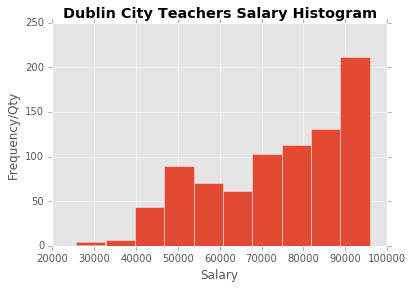

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

dublin_teachers['PAY AMOUNT'].hist()
plt.title("Dublin City Teachers Salary Histogram", weight='bold')
plt.xlabel("Salary")
plt.ylabel("Frequency/Qty")
plt.show()

#### Now, let's create a list of highest median teacher salaries by district across all of Ohio.  &nbsp; &nbsp;But, before we do, we should probably check if there are sample sizes that are too low:

In [144]:
c1 = ohio['PAY AMOUNT'] > 0
c2 = ohio['JOB DESCRIPTION'] == 'Teacher Assignment'
c3 = ohio['DAYS WORKED'] > 180
c4 = ohio['HOURS WORKED PER DAY'] >=8

ohio_teachers = ohio[c1 & c2 & c3 & c4] 
#ohio_teachers_counts = ohio_teachers.pivot_table(values='PAY AMOUNT',index='DISTRICT NAME',aggfunc='count')
ohio_teachers_counts = ohio_teachers.groupby('DISTRICT NAME')['PAY AMOUNT'].count()
print(ohio_teachers_counts.order(ascending=True)[:20])

DISTRICT NAME
missing                                   1
Madison Local                             1
Carrollton Exempted Village               1
Life Skills Ctr Of Cincinnati             1
Life Skills Center of Elyria              1
Life Skills Center Of Summit County       1
Life Skills Center  of Canton             1
Lakota Local                              1
Lakewood City                             1
Lakeview Local                            1
Lake Erie International High School       1
Jackson-Milton Local                      1
Invictus High School                      1
Cliff Park High School                    1
Indian Lake Local                         1
Hamilton Local                            1
Greene County ESC                         1
Greater Ohio Virtual School               1
Great Western Academy                     1
Constellation Schools: Parma Community    1
Name: PAY AMOUNT, dtype: int64


In [145]:
print(ohio_teachers_counts.order(ascending=False)[:20])

DISTRICT NAME
South-Western City                    1085
Olentangy Local                        853
Dublin City                            832
Middletown City                        370
Findlay City                           324
Upper Arlington City                   311
Princeton City                         283
Ohio Virtual Academy                   282
Great Oaks Inst Of Technology          238
Berea City                             217
Brecksville-Broadview Heights City     192
Avon Lake City                         190
Shaker Heights City                    165
Revere Local                           156
Talawanda City                         154
Bay Village City                       144
Big Walnut Local                       143
Buckeye Local                          134
Warrensville Heights City              110
Buckeye Local                           94
Name: PAY AMOUNT, dtype: int64


In [146]:
len(ohio_teachers_counts[ohio_teachers_counts == 1])

56

#### For whatever the reason, there are 56 districts with only 1 teacher.

<a name='merging'></a>

# Merging Data Sets

[[back to top](#top)]

#### As you can see from above, we have school districts with just one teacher for some reason.  &nbsp; &nbsp;We need to filter them out if we want make a list of top median salaries statistically meaningful.  &nbsp; &nbsp;First, we need to make a data set containing the median salaries and then merge it with the teacher counts data set above using the concat() function:

In [147]:
c1 = ohio['PAY AMOUNT'] > 0
c2 = ohio['JOB DESCRIPTION'] == 'Teacher Assignment'
c3 = ohio['DAYS WORKED'] > 180
c4 = ohio['HOURS WORKED PER DAY'] >= 8

ohio_teachers = ohio[c1 & c2 & c3 & c4]
#median_pay = ohio_teachers.pivot_table(values='PAY AMOUNT',index='DISTRICT NAME',aggfunc='median')
median_pay = ohio_teachers.groupby('DISTRICT NAME')['PAY AMOUNT'].median()
top_districts = median_pay.order(ascending=False)
# Let's just get the top 25 school districts
top_districts.head(25)

DISTRICT NAME
Oak Hills Local                       104625.0
Cuyahoga Heights Local                 91375.0
Lakewood City                          87080.0
Upper Arlington City                   85152.0
Brecksville-Broadview Heights City     82548.0
Mentor Exempted Village                79825.0
Van Wert City                          79254.0
Shaker Heights City                    79071.0
Parma City                             78887.0
Independence Local                     77652.0
Perry Local                            77584.0
Dublin City                            77029.0
Plain Local                            76503.0
Revere Local                           75928.5
U S Grant                              74067.0
Southwest Local                        73616.0
Great Oaks Inst Of Technology          73490.5
Upper Valley Career Center             73356.0
Bay Village City                       72178.0
Trotwood-Madison City                  72162.0
Berea City                             69215.0

#### Above, we have the median salaries.  &nbsp; &nbsp;Hmmm, Oak Hills Local has a median salary of over $100,000.  &nbsp; &nbsp;But, I wonder how many teachers are in that school district?  &nbsp; &nbsp;Next, we are going to merge this data set with the teacher counts data set using the concat() function to find out:

In [148]:
# Concatenate the 2 data sets along the column axis (axis=1) and label the 2 columns as median and count
top_median_salary = pd.concat([top_districts, ohio_teachers_counts], axis=1, keys=['median','count'])
top_median_salary.sort(columns='median', ascending=False, inplace=True)
top_median_salary.head(20)

,median,count
Oak Hills Local,104625.0,1
Cuyahoga Heights Local,91375.0,1
Lakewood City,87080.0,1
Upper Arlington City,85152.0,311
Brecksville-Broadview Heights City,82548.0,192
Mentor Exempted Village,79825.0,3
Van Wert City,79254.0,1
Shaker Heights City,79071.0,165
Parma City,78887.0,1
Independence Local,77652.0,67


#### Looks like the merge worked, but next we need to filter out the districts with low teacher counts.  &nbsp; &nbsp;There are school districts with high median salaries, but they had only 1 teacher!  &nbsp; &nbsp; So to make our top list meaningful, we should probably make our data set contain districts with at least 30 teachers:

<a name='top25'></a>

## Top 25 Highest Median Salaries of Ohio School Teachers by District and City

[[back to top](#top)]

In [149]:
criteria1 = top_median_salary['count'] >= 30
top_median_salary = top_median_salary[criteria1]
top_median_salary.head(25)

,median,count
Upper Arlington City,85152.0,311
Brecksville-Broadview Heights City,82548.0,192
Shaker Heights City,79071.0,165
Independence Local,77652.0,67
Perry Local,77584.0,92
Dublin City,77029.0,832
Revere Local,75928.5,156
U S Grant,74067.0,30
Great Oaks Inst Of Technology,73490.5,238
Bay Village City,72178.0,144


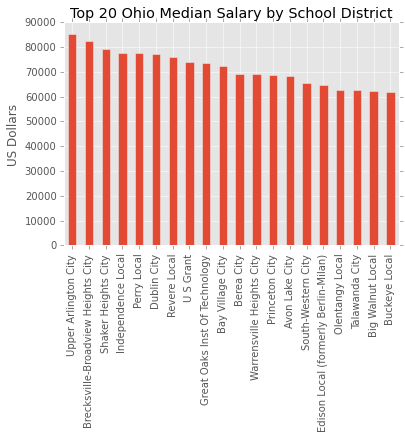

In [153]:
top_median_salary['median'][:20].plot(kind='bar')
plt.title('Top 20 Ohio Median Salary by School District')
plt.ylabel("US Dollars")
plt.show()

#### So now, we have our list of top 25 median salaries by school districts in all of the state of Ohio with at least 10 teachers.<br> We're done!

[[back to top](#top)]

## BONUS: Top 20 Highest Paid Teacher or Education Employee In All of Ohio:

In [108]:
ohio.sort(columns='PAY AMOUNT', ascending=False)[:20]

,LAST NAME,FIRST NAME,EDUCATION LEVEL,JOB DESCRIPTION,DISTRICT NAME,SCHOOL NAME,CITY NAME,DAYS WORKED,HOURS WORKED PER DAY,PAY AMOUNT
67104,Black,Aaricka,High School Diploma,Instructional Paraprofessional Assignment,Green Inspiration Academy,Green Inspiration Academy,Highland Hills,195,8.0,240000
180903,SHAWGO,PAMELA,Bachelors,Teacher Assignment,Brown Street Academy,Brown Street Academy,Akron,200,4.0,234000
210940,GORDON,ERIC,Bachelors,Superintendent Assignment,Cleveland Municipal,Cleveland Municipal,Cleveland,260,8.0,228408
186914,MENGERINK,ROBERT,Doctorate,Superintendent Assignment,ESC of Cuyahoga County,ESC of Cuyahoga County,Independence,260,7.5,205000
197745,DISTEL,DAVID,Masters,Superintendent Assignment,Hamilton County ESC,Hamilton County ESC,Cincinnati,228,7.0,201131
185861,FOWLER-MACK,CHRISTINE,Bachelors,"Assistant, Deputy/Associate Superintendent Ass...",Cleveland Municipal,Cleveland Municipal,Cleveland,260,8.0,199792
167655,ZOHN,PATRICK,Other,Other Official/Administrative Assignment,Cleveland Municipal,Cleveland Municipal,Cleveland,260,8.0,199792
211492,SCANLAN,JOHN,Masters,"Assistant, Deputy/Associate Superintendent Ass...",Cleveland Municipal,Cleveland Municipal,Cleveland,260,8.0,199792
242452,BERRY,CATHERINE,Non-degree,Vehicle Operating (Bus) Assignment,Campbell City,Campbell City,Campbell,196,6.0,199335
211553,PIERRE-FARID,MICHELLE,Masters,"Assistant, Deputy/Associate Superintendent Ass...",Cleveland Municipal,Cleveland Municipal,Cleveland,260,8.0,199173


**What stood out to me is that there is a bus driver making almost $200K per year?!  Not sure how good this data is, but it is what it is.**